In [1]:
from filter_functions import image_filter

Dashboard at http://127.0.0.1:8787/status


In [2]:
path = '/home/fische_r/NAS/testing/Jeremy_tomo/tomodata.nc'

In [3]:
IF = image_filter(data_path=path)

In [4]:
IF.open_raw_data()

/home/fische_r/miniconda3/lib/python3.9/site-packages/dask/array/core.py:3423: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


In [5]:
IF.prepare()

TypeError: can only concatenate str (not "int") to str

In [5]:
IF.compute()

AttributeError: 'image_filter' object has no attribute 'prepared'

In [7]:
test = dask.array.stack(IF.calculated_features, axis=4)

In [8]:
test

,Array,Chunk
Bytes,4.77 GiB,9.24 MiB
Shape,"(200, 39, 233, 8, 44)","(100, 13, 233, 4, 1)"
Count,16846 Tasks,528 Chunks
Type,float64,numpy.ndarray


In [9]:
test = test.rechunk('300 MiB')

In [10]:
test

dask.array<rechunk-merge, shape=(200, 39, 233, 8, 44), dtype=float64, chunksize=(200, 26, 233, 8, 4), chunktype=numpy.ndarray>

In [11]:
shp =test.shape
result = xr.Dataset({'feature_stack': (['x','y','z','time', 'feature'], test)},
                                           coords = {'x': np.arange(shp[0]),
                                           'y': np.arange(shp[1]),
                                           'z': np.arange(shp[2]),
                                           'time': np.arange(shp[3]),
                                           'feature': np.arange(shp[4])}
                                 )

In [12]:
result

<xarray.Dataset>
Dimensions:        (x: 200, y: 39, z: 233, time: 8, feature: 44)
Coordinates:
  * x              (x) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198 199
  * y              (y) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38
  * z              (z) int64 0 1 2 3 4 5 6 7 ... 225 226 227 228 229 230 231 232
  * time           (time) int64 0 1 2 3 4 5 6 7
  * feature        (feature) int64 0 1 2 3 4 5 6 7 8 ... 36 37 38 39 40 41 42 43
Data variables:
    feature_stack  (x, y, z, time, feature) float64 dask.array<chunksize=(200, 26, 233, 8, 4), meta=np.ndarray>

In [13]:
outpath = '/home/fische_r/NAS/testing/Jeremy_tomo/testfeat.nc'

In [14]:
result.to_netcdf(outpath)

In [1]:
#test loading
import xarray as xr
outpath = '/home/fische_r/NAS/testing/Jeremy_tomo/testfeat.nc'
test_result = xr.open_dataset(outpath, chunks = 'auto')

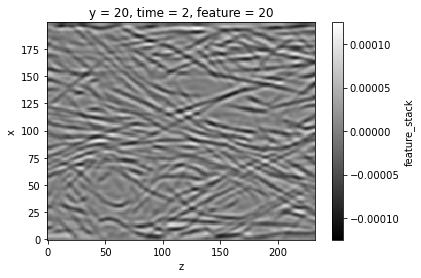

In [2]:
test_result['feature_stack'].sel(y = 20, time = 2, feature=20).plot(cmap='gray')

In [2]:
DA = test_result['feature_stack'].sel(feature = 0)

In [3]:
DA

<xarray.DataArray 'feature_stack' (x: 200, y: 39, z: 233, time: 8)>
dask.array<getitem, shape=(200, 39, 233, 8), dtype=float64, chunksize=(50, 13, 233, 2), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 191 192 193 194 195 196 197 198 199
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 ... 29 30 31 32 33 34 35 36 37 38
  * z        (z) int64 0 1 2 3 4 5 6 7 8 ... 224 225 226 227 228 229 230 231 232
  * time     (time) int64 0 1 2 3 4 5 6 7
    feature  int64 0

In [66]:
test = DA.copy()

In [62]:
for i in range(DA.shape[-1]):
    test[...,i] = DA[...,i] - DA[...,0]

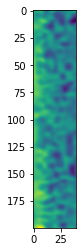

In [8]:
plt.imshow(DA[:,:,5,7])

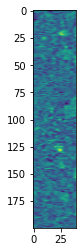

In [64]:
plt.imshow(test[:,:,5,7])

In [11]:
import matplotlib.pyplot as plt

In [51]:
test2 = test.compute()

In [67]:
test

dask.array<rechunk-merge, shape=(200, 39, 233, 8), dtype=float64, chunksize=(100, 13, 233, 4), chunktype=xarray.DataArray>

In [57]:
test = DA - DA[...,-1]

AssertionError: 

In [10]:
def ball_4d(sig):
    bnd = np.zeros((sig*2+1,sig*2+1,sig*2+1,sig*2+1), dtype = bool)
    bnd[sig,sig,sig,sig] = True
    ecd = ndimage.distance_transform_edt(~bnd)
    bnd = (ecd<sig+0.01).astype(int)
    return bnd

In [5]:
import dask_image.ndfilters
from scipy import ndimage
import numpy as np

In [6]:
import dask

In [18]:
da = dask.array.from_array(DA)

In [19]:
da

dask.array<array, shape=(200, 39, 233, 8), dtype=float64, chunksize=(200, 39, 233, 8), chunktype=xarray.DataArray>

In [7]:
test_im = dask_image.ndfilters.rank_filter(DA, 0, footprint=ball_4d(2))

AttributeError: 'DataArray' object has no attribute 'map_overlap'

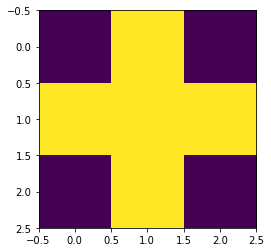

In [12]:
plt.imshow(ball_4d(1)[:,:,1,1])